In [69]:
import pickle
import math
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
with open('eth_bot2top.pkl', 'rb') as f:
    records = pickle.load(f)

In [71]:
index = records.keys()
columns = ['success', 'travel_time', 'collision']
df = pd.DataFrame(index=index, columns=columns)

In [72]:
def check_collision(robot_pose, obstacle):
    dist = math.sqrt(math.pow(robot_pose.x-obstacle.x, 2) + math.pow(robot_pose.y-obstacle.y, 2))
    if dist < 0.35:
        return True

In [73]:
for trial, trial_record in records.items():
    success = False
    travel_time = 0
    collision = False
    for single_record in trial_record:
        traveling = False
        for status in single_record[0].status_list:
            if status.status == 1:
                travel_time += 1
                traveling = True
        robot_pose = single_record[1].pose.pose.position
        if traveling and abs(robot_pose.y)<6.5:
            for obstacle in single_record[2].obstacles:
                if check_collision(robot_pose, obstacle.polygon.points[0]):
                    collision = True
    if status.status == 3:
        success = True
    df.loc[trial]['success'] = success
    df.loc[trial]['travel_time'] = travel_time/10. if success else 0.0
    df.loc[trial]['collision'] = collision

In [41]:
df = df.drop([4830,
             4860,
             4890,
             4920,
             4950,
             4980,
             5010])

KeyError: '[4860 4890 4920 4950 4980 5010] not found in axis'

0.3913844926862459
40


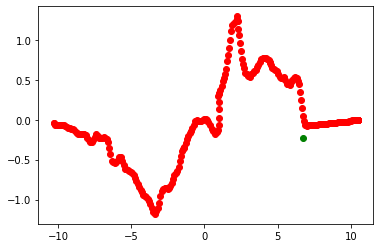

In [26]:
import matplotlib.pyplot as plt
trial_record = records[4680]
single_record = trial_record[0]
for index,single_record in enumerate(trial_record):
    robot_pose = single_record[1].pose.pose.position
    plt.scatter(robot_pose.x, robot_pose.y, c='red')
    for obstacle in single_record[2].obstacles:
        if check_collision(robot_pose, obstacle.polygon.points[0]):
            plt.scatter(obstacle.polygon.points[0].x, obstacle.polygon.points[0].y, c='green')
            print(index)
#     plt.show()

In [12]:
trial_record = records[810]
single_record = trial_record[0]
for single_record in trial_record:
    robot_pose = single_record[1].pose.pose.position
    plt.scatter(robot_pose.x, robot_pose.y, c='red')
    for obstacle in single_record[2].obstacles:
        plt.scatter(obstacle.polygon.points[0].x, obstacle.polygon.points[0].y, c='green')

NameError: name 'plt' is not defined

In [74]:
success_rate = float(df['success'].value_counts().loc[True])/len(df['success'])
collision_rate = 1 - float(df['collision'].value_counts().loc[False])/len(df['collision'])
avg_travel_time = df['travel_time'].sum()/df['success'].value_counts().loc[True]

In [75]:
print('success rate:{} collision_rate:{} avg_travel_time:{}'.format(success_rate, collision_rate, avg_travel_time))

success rate:1.0 collision_rate:0.0028901734104 avg_travel_time:15.286416185


In [77]:
print(float(df['collision'].value_counts().loc[False]), len(df['collision']))

(345.0, 346)


In [39]:
print(float(df['collision'].value_counts().loc[False]), len(df['collision']))

(135.0, 142)


In [24]:
print(float(df['collision'].value_counts().loc[False]), len(df['collision']))

(80.0, 84)


In [ ]:
135, 165

In [1]:
import multiprocessing, time

In [2]:
class Process():
    def __init__(self, a, b):
        self.a = a
        self.b = b
    def subprocess(self, i):
        self.a = 0
        self.c = i
        for i in range(100000):
            self.a = i*i*i
#         print((self.a,self.c))
        self.a *= self.c
    def process(self):
        t0 = time.time()
        p = multiprocessing.Pool(10)
        p.map(self.subprocess, range(0, 20))
#         for i in range(20):
#             self.subprocess(i) 
        t1 = time.time()
        print(t1-t0)

In [39]:
right2left(126.+135+80)/(165+136+84)

0.8857142857142857

In [40]:
(165+136+84)

385

In [67]:
1-0.11227154047

0.88772845953

In [ ]:
0.9971098265896 bot2top 15.286416185
0.9819121447028 top2bot
0.88772845953 left2right 21.6561357702
0.8857142857142857 right2left 

In [68]:
(0.9971098265896+0.9819121447028+0.88772845953+0.8857142857142857)/4

0.9381161791341714

In [76]:
(15.286416185+21.6561357702)/2

18.4712759776

In [82]:
435./426*50

51.056338028169016